In [1]:
import torch
from torch import nn
import lightning as L
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vocab = ["troll 2", "is", "great", 'gymkata']
inputs = ["Troll 2 is great!", "Gymkata is great!"]

#one hot encoding for each word
inputs = torch.tensor([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

labels = torch.tensor([
    [0, 1, 0, 0], #If input is troll 2, expect is as the output
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 1, 0, 0] #If input is gymkata, expect is as the output
])


In [3]:
dataset = torch.utils.data.TensorDataset(inputs, labels)
dataloader = torch.utils.data.DataLoader(dataset=dataset, shuffle=True, batch_size=1)

In [4]:
class WordEmbeddingfromScratch(nn.Module):
    def __init__(self):
        super(WordEmbeddingfromScratch, self).__init__()

        self.input1w1 = nn.Parameter(torch.randn(1))
        self.input1w2 = nn.Parameter(torch.randn(1))


        self.input2w1 = nn.Parameter(torch.randn(1))
        self.input2w2 = nn.Parameter(torch.randn(1))


        self.input3w1 = nn.Parameter(torch.randn(1))
        self.input3w2 = nn.Parameter(torch.randn(1))


        self.input4w1 = nn.Parameter(torch.randn(1))
        self.input4w2 = nn.Parameter(torch.randn(1))



        self.output1w1 = nn.Parameter(torch.randn(1))
        self.output1w2 = nn.Parameter(torch.randn(1))


        self.output2w1 = nn.Parameter(torch.randn(1))
        self.output2w2 = nn.Parameter(torch.randn(1))


        self.output3w1 = nn.Parameter(torch.randn(1))
        self.output3w2 = nn.Parameter(torch.randn(1))


        self.output4w1 = nn.Parameter(torch.randn(1))
        self.output4w2 = nn.Parameter(torch.randn(1))
   
    def forward(self, x):
        input = x[0]

        inputs_top_hidden = (
            (input[0] * self.input1w1)+
            (input[1] * self.input2w1)+
            (input[2] * self.input3w1)+
            (input[3] * self.input4w1)
        )

        inputs_bottom_hidden = (
            (input[0] * self.input1w1)+
            (input[1] * self.input2w1)+
            (input[2] * self.input3w1)+
            (input[3] * self.input4w1)
        )


        output1 = (inputs_top_hidden * self.output1w1) + (inputs_top_hidden * self.output1w2)
        output2 = (inputs_top_hidden * self.output2w1) + (inputs_top_hidden * self.output2w2)
        output3 = (inputs_top_hidden * self.output3w1) + (inputs_top_hidden * self.output3w2)
        output4 = (inputs_top_hidden * self.output4w1) + (inputs_top_hidden * self.output4w2)

        output_presoftmax = torch.stack([output1, output2, output3, output4], dim=1)
        return output_presoftmax

In [5]:
from tqdm import tqdm
model = WordEmbeddingfromScratch()
optimizer = torch.optim.AdamW(params=model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()

In [6]:
epochs = 100

for epochs in tqdm(range(epochs)):
    for x, y in dataloader:
        logits = model(x)
        loss = loss_fn(logits, y.type(torch.float32))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
print(loss)

 21%|██        | 21/100 [00:00<00:00, 103.04it/s]

100%|██████████| 100/100 [00:00<00:00, 152.50it/s]

tensor(0.8697, grad_fn=<DivBackward1>)


In [7]:
input = torch.tensor([[0, 0, 0, 0]])
with torch.inference_mode():
    logits = model(input)
    probs = torch.softmax(logits, dim=1)
    preds = torch.argmax(probs)
print(preds)
print(f"Input --> {vocab[torch.argmax(input)]}")
print(vocab[preds])

tensor(0)
Input --> troll 2
troll 2


In [8]:
import seaborn as sns

In [9]:
data = {
    "w1": [
        model.input1w1.item(),
        model.input2w1.item(),
        model.input3w1.item(),
        model.input4w1.item(),
    ],

    "w2": [
        model.input1w2.item(),
        model.input2w2.item(),
        model.input3w2.item(),
        model.input4w2.item(),
    ],

    "token": vocab,
}

df = pd.DataFrame(data=data)
df

,w1,w2,token
0,-6.031919,1.880490,troll 2
1,1.836322,0.140816,is
2,-0.321435,-0.666730,great
3,-5.955524,-0.052193,gymkata


Text(-5.955524444580078, -0.052193447947502136, 'gymkata')

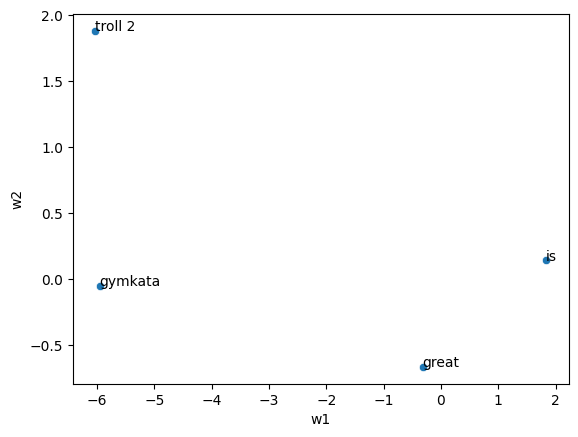

In [10]:
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0], df.w2[0], df.token[0])
plt.text(df.w1[1], df.w2[1], df.token[1])
plt.text(df.w1[2], df.w2[2], df.token[2])
plt.text(df.w1[3], df.w2[3], df.token[3])

In [11]:
class WordEmbedding(nn.Module):
    def __init__(self):
        super(WordEmbedding, self).__init__()

        self.linear1 = nn.Linear(in_features=4, out_features=2, bias=False)
        self.linear2 = nn.Linear(in_features=2, out_features=4, bias=False)

    def forward(self, x):
        h = self.linear1(x)
        return self.linear2(h)

In [12]:
model = WordEmbedding()
optimizer = torch.optim.AdamW(params=model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()



In [13]:
epochs = 10000

for epochs in tqdm(range(epochs)):
    for x, y in dataloader:
        logits = model(x.type(torch.float32))
        loss = loss_fn(logits, y.type(torch.float32))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
print(loss)

100%|██████████| 10000/10000 [00:19<00:00, 504.79it/s]

tensor(-0., grad_fn=<DivBackward1>)


In [14]:
input = torch.tensor([[1, 0, 0, 0]], dtype=torch.float32)
with torch.inference_mode():
    logits = model(input)
    probs = torch.softmax(logits, dim=1)
    preds = torch.argmax(probs)
print(preds)
print(f"Input --> {vocab[torch.argmax(input)]}")
print(vocab[preds])

tensor(1)
Input --> troll 2
is


In [15]:
data = {
    "w1": model.linear1.weight.detach()[0].numpy(),
    "w2": model.linear1.weight.detach()[1].numpy(),

    "token": vocab,
}

df = pd.DataFrame(data=data)
df

,w1,w2,token
0,-0.643668,-8.495802,troll 2
1,4.575456,1.108247,is
2,-3.844294,-0.916255,great
3,-0.843224,-9.223232,gymkata


Text(-0.8432241082191467, -9.22323226928711, 'gymkata')

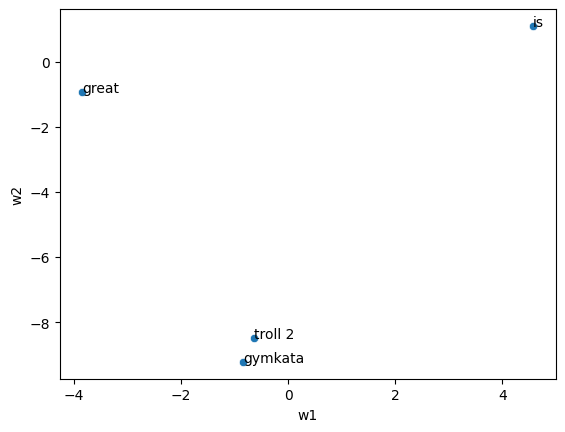

In [16]:
sns.scatterplot(data=df, x="w1", y="w2")
plt.text(df.w1[0], df.w2[0], df.token[0])
plt.text(df.w1[1], df.w2[1], df.token[1])
plt.text(df.w1[2], df.w2[2], df.token[2])
plt.text(df.w1[3], df.w2[3], df.token[3])

In [139]:
#Using nn.Embedding

class WordPredict(nn.Module):
    def __init__(self, vocab_size, n_crammed_dimension):
        super(WordPredict, self).__init__()

        self.token_embedding = nn.Embedding(vocab_size, n_crammed_dimension)
        self.fl = nn.Linear(in_features=n_crammed_dimension, out_features=4)

    def forward(self, x, batched:bool):
        emb = self.token_embedding(x)
        if batched:
            B, T, C = emb.shape
            emb = emb.view(B*T, C)
        #logits = self.fl(emb)
        #logits = self.fl(emb)
        #print(logits.shape)
        #if batched:

            
        return emb



In [141]:
print(inputs[0])
model = WordPredict(vocab_size=len(vocab), n_crammed_dimension=2)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()


tensor([1, 0, 0, 0])


In [176]:
epochs = 1

for epoch in tqdm(range(epochs)):
    for x, y in dataloader:
        logits = model(x, True)
        y = y.view(-1) #unbatch the y because the logits are also unbatched at the end

        loss = loss_fn(logits, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print(loss)

100%|██████████| 1/1 [00:00<00:00, 419.14it/s]

tensor(0.4782, grad_fn=<NllLossBackward0>)


In [133]:
with torch.inference_mode():
    logits = model(torch.tensor([[0, 0, 1, 0]]), batched=True)
    probs = torch.softmax(logits, dim=1)
    preds = torch.argmax(probs, dim=1)
print(preds)

tensor([0, 0, 0, 0])
